In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
pd.set_option('display.max_rows', None)

In [2]:
#Reading all the given DataSets

df1=pd.read_csv('Datasets/Titanic/train.csv')
df2=pd.read_csv('Datasets/Titanic/test.csv')
upld=pd.read_csv('Datasets/Titanic/gender_submission.csv')

In [3]:
#df1

In [4]:
#df2

In [5]:
#df1.describe()

In [6]:
#df2.describe()

In [7]:
#Calling Label encoder to encode categorical variables
le=LabelEncoder()

In [8]:
#Checking for Null Values
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#Checking for Null Values
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Dropping Pasenger ID, there are ways to feature engineer this as well but I coulnd't get any significant data from it
df1=df1.drop('PassengerId',axis=1)
df2=df2.drop('PassengerId',axis=1)

In [11]:
#Combining these two features, Doing it up top cause if you do it later sex being a categorical variable will make it useless
df1['Pclass_Sex'] = df1['Pclass'] * df1['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df2['Pclass_Sex'] = df2['Pclass'] * df2['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [12]:
#Making Sex a cateorical variable using Label Encoder 
df1['Sex']=le.fit_transform(df1['Sex'])
df2['Sex']=le.fit_transform(df2['Sex'])

## Feature Engineering the Name Column

In [14]:
#Grabbing the salutations from the Name feature
df1['Salutation']=df1['Name'].str.extract(r'(\b[A-Za-z]+\.)')
df2['Salutation']=df2['Name'].str.extract(r'(\b[A-Za-z]+\.)')

In [15]:
#Checking what all types of salutations are present in the dataset
df1['Salutation'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [16]:
df2['Salutation'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Dona.'], dtype=object)

In [17]:
#Putting all the more rare or interesting titles under one as they might get higher probability of surviving
rare_titles=['Lady.','Countess.','Capt.','Col.','Dona.','Don.','Dr.','Major.','Rev.','Sir.','Jonkheer.']

In [18]:
df1['Salutation']=df1['Salutation'].replace(rare_titles,'Other.')
df2['Salutation']=df2['Salutation'].replace(rare_titles,'Other.')

In [19]:
#Putting the similar salutations into one
df1['Salutation']=df1['Salutation'].replace(['Mlle.','Miss.','Mme.'],'Ms.')
df2['Salutation']=df2['Salutation'].replace(['Mlle.','Miss.','Mme.'],'Ms.')

In [20]:
df1['Salutation'].value_counts()

Salutation
Mr.        517
Ms.        186
Mrs.       125
Master.     40
Other.      23
Name: count, dtype: int64

In [21]:
df2['Salutation'].value_counts()

Salutation
Mr.        240
Ms.         79
Mrs.        72
Master.     21
Other.       6
Name: count, dtype: int64

In [22]:
#Being a Doctor or Royalty could prove to have some correlation with survival chances
df1['Is_Doctor']=df1['Name'].str.contains('Dr.',regex=False).astype(int)
df1['Is_Royalty']=df1['Name'].str.contains('Countess.|Lady.|Sir.|Jonkheer.').astype(int)

In [23]:
df2['Is_Doctor']=df2['Name'].str.contains('Dr.',regex=False).astype(int)
df2['Is_Royalty']=df2['Name'].str.contains('Countess.|Lady.|Sir.|Jonkheer.').astype(int)

In [24]:
#We got as much feature engineering as we wanted, so dropping the name column
df1=df1.drop('Name',axis=1)
df2=df2.drop('Name',axis=1)

In [25]:
#Fit on the combined data from both dataframes to ensure consistency
combined_data=pd.concat([df1['Salutation'],df2['Salutation']])
le.fit(combined_data)

LabelEncoder()

In [26]:
df1['Salutation']=le.transform(df1['Salutation'])
df2['Salutation']=le.transform(df2['Salutation'])

## Feature Engineering the Ticket Column

In [28]:
#Using the Ticket Prefix, it can help with filling the missing data and might even help with survival chances
df1['TicketPrefix']=df1['Ticket'].apply(lambda x: x.split()[0] if len(x.split())>1 else 'NoPrefix')
df2['TicketPrefix']=df2['Ticket'].apply(lambda x: x.split()[0] if len(x.split())>1 else 'NoPrefix')

In [29]:
df1['TicketPrefix'].nunique()

43

In [30]:
df2['TicketPrefix'].nunique()

35

In [31]:
#Fit on the combined data from both dataframes to ensure consistency
combined_data=pd.concat([df1['TicketPrefix'],df2['TicketPrefix']])
le.fit(combined_data)

LabelEncoder()

In [32]:
df1['TicketPrefix']=le.transform(df1['TicketPrefix'])
df2['TicketPrefix']=le.transform(df2['TicketPrefix'])

In [33]:
#Drpoing Ticket feature as it isn't of any use to us anymore
df1=df1.drop('Ticket',axis=1)
df2=df2.drop('Ticket',axis=1)

In [34]:
#df1

In [35]:
#df2

## Feature Engineering the Cabin Column

In [37]:
#Grabbing the deck number from the cabin feature
df1['Deck']=df1['Cabin'].str[0]
df2['Deck']=df2['Cabin'].str[0]

In [38]:
df1['Deck']=df1['Deck'].fillna('NA')
df2['Deck']=df2['Deck'].fillna('NA')

In [39]:
df1['Deck'].nunique()

9

In [40]:
df2['Deck'].nunique()

8

In [41]:
#Drpoing Cabin feature as it isn't of any use to us anymore
df1=df1.drop('Cabin',axis=1)
df2=df2.drop('Cabin',axis=1)

In [42]:
#Fit on the combined data from both dataframes to ensure consistency
combined_data=pd.concat([df1['Deck'],df2['Deck']])
le.fit(combined_data)

LabelEncoder()

In [43]:
df1['Deck']=le.transform(df1['Deck'])
df2['Deck']=le.transform(df2['Deck'])

## Feature Engineering the Embarked Column

In [45]:
#Exploratory Data Analysis
df1[df1['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_Sex,Salutation,Is_Doctor,Is_Royalty,TicketPrefix,Deck
61,1,1,0,38.0,0,0,80.0,NaN,0,3,0,0,20,1
829,1,1,0,62.0,0,0,80.0,NaN,0,2,0,0,20,1


In [46]:
#Checking other data points with similar features, as it turns out all of them embarked from Southampton
df1[(df1['Survived']==1) & (df1['Pclass']==1) & (df1['Sex']==0) & (df1['SibSp']==0) & (df1['Parch']==0) & (df1['Deck']==1) & (df1['Is_Doctor']==0) & (df1['Is_Royalty']==0) & (df1['TicketPrefix']==20)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_Sex,Salutation,Is_Doctor,Is_Royalty,TicketPrefix,Deck
61,1,1,0,38.0,0,0,80.0000,NaN,0,3,0,0,20,1
257,1,1,0,30.0,0,0,86.5000,S,0,3,0,0,20,1
504,1,1,0,16.0,0,0,86.5000,S,0,3,0,0,20,1
520,1,1,0,30.0,0,0,93.5000,S,0,3,0,0,20,1
730,1,1,0,29.0,0,0,211.3375,S,0,3,0,0,20,1
829,1,1,0,62.0,0,0,80.0000,NaN,0,2,0,0,20,1
887,1,1,0,19.0,0,0,30.0000,S,0,3,0,0,20,1


In [47]:
#Filling in missing data
df1['Embarked']=df1['Embarked'].fillna('S')

In [48]:
#Fit on the combined data from both dataframes to ensure consistency
combined_data=pd.concat([df1['Embarked'],df2['Embarked']])
le.fit(combined_data)

LabelEncoder()

In [49]:
df1['Embarked']=le.transform(df1['Embarked'])
df2['Embarked']=le.transform(df2['Embarked'])

In [50]:
df1.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          0
Pclass_Sex        0
Salutation        0
Is_Doctor         0
Is_Royalty        0
TicketPrefix      0
Deck              0
dtype: int64

In [51]:
df2.isnull().sum()

Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Embarked         0
Pclass_Sex       0
Salutation       0
Is_Doctor        0
Is_Royalty       0
TicketPrefix     0
Deck             0
dtype: int64

## Feature Engineering the Fare Column

In [53]:
#Exploratory Data Analysis to fill missing data
df2[df2['Fare'].isnull()==True]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_Sex,Salutation,Is_Doctor,Is_Royalty,TicketPrefix,Deck
152,3,1,60.5,0,0,NaN,2,3,1,0,0,20,7


In [54]:
#Checking data points with similar features as the missing data
df=df2[(df2['Deck']==7) & (df2['Pclass']==3) & (df2['Embarked']==2) & (df2['Parch']==0) & (df2['SibSp']==0)]

In [55]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_Sex,Salutation,Is_Doctor,Is_Royalty,TicketPrefix,Deck
3,3,1,27.0,0,0,8.6625,2,3,1,0,0,20,7
5,3,1,14.0,0,0,9.2250,2,3,1,0,0,20,7
10,3,1,NaN,0,0,7.8958,2,3,1,0,0,20,7
36,3,0,NaN,0,0,8.0500,2,0,3,0,0,20,7
37,3,0,21.0,0,0,8.6625,2,0,3,0,0,20,7
38,3,1,25.0,0,0,9.5000,2,3,1,0,0,20,7
39,3,1,NaN,0,0,56.4958,2,3,1,0,0,20,7
42,3,1,41.0,0,0,7.8500,2,3,1,0,0,39,7
45,3,1,25.0,0,0,7.9250,2,3,1,0,0,42,7
56,3,1,35.0,0,0,7.8958,2,3,1,0,0,20,7


In [56]:
#Getting mean of the Fare Feature from the data points with same characteristics as our data point with missing data
df.dropna()['Fare'].mean()

9.096216923076922

In [57]:
#Filling missing data
df2['Fare']=df2['Fare'].fillna(9.0962)

In [58]:
df2.isnull().sum()

Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             0
Embarked         0
Pclass_Sex       0
Salutation       0
Is_Doctor        0
Is_Royalty       0
TicketPrefix     0
Deck             0
dtype: int64

In [59]:
#Putting fare in fare bins
bins_fare=[-1, 7.91, 14.454, 31, 513]  
labels_fare=['Low', 'Medium', 'High', 'Very High']  
df1['FareBin']=pd.cut(df1['Fare'],bins=bins_fare,labels=labels_fare)
df2['FareBin']=pd.cut(df2['Fare'],bins=bins_fare,labels=labels_fare)

In [60]:
#Fit on the combined data from both dataframes to ensure consistency
combined_data=pd.concat([df1['FareBin'],df2['FareBin']])
le.fit(combined_data)

LabelEncoder()

In [61]:
df1['FareBin']=le.transform(df1['FareBin'])
df2['FareBin']=le.transform(df2['FareBin'])

## Feature Engineering the Age Column

In [63]:
#Checking correlation of Age with other features
df1.corr(numeric_only=True)['Age'].sort_values()

Pclass         -0.369226
SibSp          -0.308247
Deck           -0.267161
Parch          -0.189119
Pclass_Sex     -0.077668
Survived       -0.077221
Embarked       -0.030394
TicketPrefix    0.013673
Salutation      0.026639
Is_Royalty      0.048021
Is_Doctor       0.078008
FareBin         0.078153
Sex             0.093254
Fare            0.096067
Age             1.000000
Name: Age, dtype: float64

In [64]:
df2.corr(numeric_only=True)['Age'].sort_values()

Pclass         -0.492143
Deck           -0.410784
Pclass_Sex     -0.180222
Embarked       -0.175848
SibSp          -0.091587
Parch          -0.061249
TicketPrefix   -0.004950
Sex             0.000013
Salutation      0.018607
Is_Doctor       0.088222
FareBin         0.165386
Fare            0.332103
Age             1.000000
Is_Royalty           NaN
Name: Age, dtype: float64

In [65]:
#As it turns ot it is highest with Salutation
avg_age1=df1.groupby('Salutation').mean(numeric_only=True)['Age']

In [66]:
avg_age2=df2.groupby('Salutation').mean(numeric_only=True)['Age']

In [67]:
#Making a function to fill the missing data
def fill_age1(Sal,Age):
    if np.isnan(Age):
        return avg_age1[Sal]
    else:
        return Age    

In [68]:
def fill_age2(Sal,Age):
    if np.isnan(Age):
        return avg_age2[Sal]
    else:
        return Age    

In [69]:
df1['Age']=df1.apply(lambda x:fill_age1(x['Salutation'],x['Age']),axis=1)
df2['Age']=df2.apply(lambda x:fill_age2(x['Salutation'],x['Age']),axis=1)

In [70]:
df1.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Pclass_Sex      0
Salutation      0
Is_Doctor       0
Is_Royalty      0
TicketPrefix    0
Deck            0
FareBin         0
dtype: int64

In [71]:
df2.isnull().sum()

Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Pclass_Sex      0
Salutation      0
Is_Doctor       0
Is_Royalty      0
TicketPrefix    0
Deck            0
FareBin         0
dtype: int64

In [72]:
#Putting Age into Age bins
bins_age=[0, 12, 18, 35, 60, 120]  
labels_age=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior']
df1['AgeBin']=pd.cut(df1['Age'],bins=bins_age, labels=labels_age)
df2['AgeBin']=pd.cut(df2['Age'],bins=bins_age, labels=labels_age)

In [73]:
combined_data=pd.concat([df1['AgeBin'],df2['AgeBin']])
le.fit(combined_data)

LabelEncoder()

In [74]:
df1['AgeBin']=le.transform(df1['AgeBin'])
df2['AgeBin']=le.transform(df2['AgeBin'])

In [75]:
#Checking what data point is under 16 or considered a child, might have some correlation with survival
df1['IsChild']=(df1['Age']<16).astype(int)
df2['IsChild']=(df2['Age']<16).astype(int)

## Combining Features

In [77]:
df1['Age_Pclass'] = df1['Age'] * df1['Pclass']
df2['Age_Pclass'] = df2['Age'] * df2['Pclass']

In [78]:
#Creating a overall family feature as most probably entire famlies either survived or perished together
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1
df1['IsAlone'] = 1 
df1['IsAlone'].loc[df1['FamilySize'] > 1] = 0

C:\Users\WAHEGURU JI\AppData\Local\Temp\ipykernel_2792\2891926672.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['IsAlone'].loc[df1['FamilySize'] > 1] = 0


In [79]:
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1
df2['IsAlone'] = 1 
df2['IsAlone'].loc[df2['FamilySize'] > 1] = 0

C:\Users\WAHEGURU JI\AppData\Local\Temp\ipykernel_2792\1697181316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['IsAlone'].loc[df2['FamilySize'] > 1] = 0


In [80]:
#Putting family size into bins
Family_Category_bins=[0, 1, 4, 11]
Family_Category_labels=['Alone', 'Small', 'Large']
df1['FamilyCategory']=pd.cut(df1['FamilySize'],bins=Family_Category_bins, labels=Family_Category_labels)
df2['FamilyCategory']=pd.cut(df2['FamilySize'], bins=Family_Category_bins, labels=Family_Category_labels)

In [81]:
combined_data=pd.concat([df1['FamilyCategory'],df2['FamilyCategory']])
le.fit(combined_data)

LabelEncoder()

In [82]:
df1['FamilyCategory'] = le.transform(df1['FamilyCategory'])
df2['FamilyCategory'] = le.transform(df2['FamilyCategory'])

In [83]:
df1['FarePerPerson'] = df1['Fare'] / df1['FamilySize']
df2['FarePerPerson'] = df2['Fare'] / df2['FamilySize']

In [84]:
bins_fare_per_person = [0, 8, 15, 31, 600]
labels_fare_per_person = ['Very Low', 'Low', 'Medium', 'High']
df1['FarePerPersonBin'] = pd.cut(df1['FarePerPerson'], bins=bins_fare_per_person, labels=labels_fare_per_person)
df2['FarePerPersonBin'] = pd.cut(df2['FarePerPerson'], bins=bins_fare_per_person, labels=labels_fare_per_person)

In [85]:
combined_data=pd.concat([df1['FarePerPersonBin'],df2['FarePerPersonBin']])
le.fit(combined_data)

LabelEncoder()

In [86]:
df1['FarePerPersonBin'] = le.transform(df1['FarePerPersonBin'])
df2['FarePerPersonBin'] = le.transform(df2['FarePerPersonBin'])

In [87]:
df1['Parch_SibSp_Interaction'] = df1['Parch'] * df1['SibSp']
df2['Parch_SibSp_Interaction'] = df2['Parch'] * df2['SibSp']

## Model

In [89]:
df1.shape

(891, 24)

In [90]:
df1.corr(numeric_only=True)['Survived'].sort_values()

Sex                       -0.543351
Pclass_Sex                -0.542493
Age_Pclass                -0.346335
Pclass                    -0.338481
Deck                      -0.295113
IsAlone                   -0.203367
FarePerPersonBin          -0.200890
Embarked                  -0.167675
Age                       -0.089235
Parch_SibSp_Interaction   -0.077257
SibSp                     -0.035322
Is_Doctor                  0.008185
FamilySize                 0.016639
Is_Royalty                 0.019667
TicketPrefix               0.021126
AgeBin                     0.066507
Parch                      0.081629
FareBin                    0.117465
IsChild                    0.136884
FarePerPerson              0.221600
FamilyCategory             0.249714
Fare                       0.257307
Salutation                 0.388604
Survived                   1.000000
Name: Survived, dtype: float64

In [91]:
X_train=df1.drop('Survived',axis=1).values

In [92]:
y_train=df1['Survived'].values

In [93]:
X_test=df2.values

In [94]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [95]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [96]:
#I tried alot of different models from regression to forest, but I find Neural Network works best cause we've got quite a few features now.
#We just need to ensure we don't overfit

model = Sequential()

model.add(Dense(24, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(12, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.fit(X_train, y_train, epochs=100, batch_size=10,callbacks=early_stopping)

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7446
Epoch 2/100
87/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6494

D:\Anaconda\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6495
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6188
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6127
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6165
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6017
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5875
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5696
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5636
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5466
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5337
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5293
Epoch 13/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5226
Epoch 14/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5315
Epoch 15/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5188
Epoch 16/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5313
Epoch 17/100
90

In [98]:
losses=pd.DataFrame(model.history.history)

<Axes: >

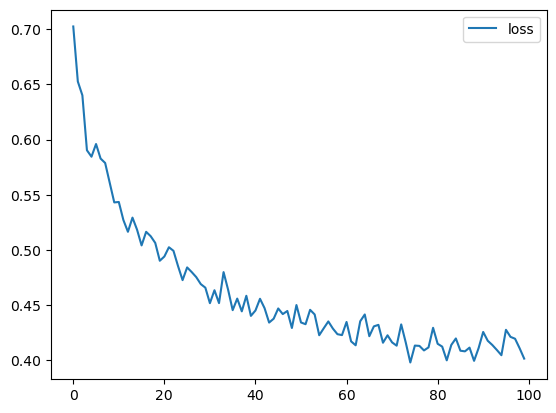

In [99]:
losses.plot()

In [100]:
#Predicting on our Test.csv
pred=(model.predict(X_test)>0.5).astype('int32')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [101]:
#Saving the File
pred=pd.DataFrame(data=pred,columns=['Survived'])
upld['Survived']=pred
upld.to_csv('outputB.csv', index=False)